<a href="https://colab.research.google.com/github/dosthzyno/DL/blob/main/MLP/DL(MLP)_%EA%B3%BC%EC%A0%9C%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

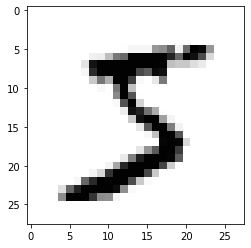

In [5]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28, 28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [6]:
y_train.shape

(60000,)

In [7]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [8]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [9]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = tf.keras.Sequential()

model.add(keras.Input(shape=(784)))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



내가 만든 모델을 확인해 봅시다.

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 1024)             

model을 자유롭게 train 해봅시다.  

In [12]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2745 - accuracy: 0.9197
Epoch 2/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1536 - accuracy: 0.9544
Epoch 3/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1203 - accuracy: 0.9633
Epoch 4/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0965 - accuracy: 0.9703
Epoch 5/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0830 - accuracy: 0.9748
Epoch 6/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0661 - accuracy: 0.9798
Epoch 7/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0581 - accuracy: 0.9825
Epoch 8/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0500 - accuracy: 0.9844
Epoch 9/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 10/50
1875/1875 [==============================] - 20s 11m

95%이상의 성능을 가진 모델을 만들면 완성!

In [13]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 2s - loss: 0.0781 - accuracy: 0.9867 - 2s/epoch - 5ms/step

Accuracy: 0.9866999983787537


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)